# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

На ценообразование из самых вероятных факторов могли повлиять расстояние до городского центра или важных направлений, близость от угодий, площадь квартиры и количество комнат.

В параметры квартир входят: наличие балкона, количество комнат, этажность, жилая площадь, площадь кухни.

Кроме того, можно предположить, что время выставления объявления, а также то, сколько объявление было доступно на сайте, имеют влияние на спрос.

Какой город(а) "предлагают" больше всего квартир?
Какие факторы имеют большее/меньшее значение на скорость продажи?
Влияет ли расстояние до природных угодий на скорость продажи? До аэропорта?
Влияют ли параметры квартиры на скорость сделки?
Расстояние до городского центра: влияет ли на скорость продажи квартиры? И в какой мере? т.е. всегда ли?
Есть ли периоды времени, когда можно ожидать самые свежие объявления?
Какой год был самым богатым на предложения недвижимости?


**Дополнительная литература** 
- <a href=" https://coderoad.ru/38579532/pandas-%D1%8D%D0%BA%D0%B2%D0%B8%D0%B2%D0%B0%D0%BB%D0%B5%D0%BD%D1%82-np-where">Использование np.where для простановки значений</a> 


### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb

In [2]:
pip install seaborn==0.11.0  #Выдавал ошибку, не хотел делать histplot

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
data = pd.read_csv('real_estate_data.csv', sep = '\t')
#Взято отсюда https://webtort.ru/%D0%BA%D0%B0%D0%BA-%D0%B2%D1%8B%D0%B2%D0%B5%D1%81%D1%82%D0%B8-%D0%B2%D1%81%D1%8E-%D1%82%D0%B0%D0%B1%D0%BB%D0%B8%D1%86%D1%83-%D0%B2-pandas/
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_colwidth', None)

In [4]:
data.sample(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23431,10,3950000.0,41.2,2018-02-16T00:00:00,1,NaN,23.0,19.2,11,NaN,False,False,10.0,NaN,посёлок Шушары,12932.0,18718.0,0.0,NaN,0.0,NaN,177.0
19009,17,1400000.0,31.0,2017-09-07T00:00:00,1,2.50,5.0,18.0,3,NaN,False,False,6.0,2.0,городской посёлок Мга,NaN,NaN,NaN,NaN,NaN,NaN,511.0
787,3,2750000.0,41.0,2016-01-25T00:00:00,2,NaN,4.0,26.0,2,False,False,False,5.0,1.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,428.0
610,6,1800000.0,32.0,2018-08-04T00:00:00,1,3.00,2.0,17.0,1,NaN,False,False,7.0,NaN,Луга,NaN,NaN,NaN,NaN,NaN,NaN,37.0
2957,9,15450000.0,97.1,2016-07-04T00:00:00,2,3.65,4.0,57.8,1,NaN,False,False,10.6,0.0,Санкт-Петербург,22704.0,1313.0,2.0,684.0,3.0,29.0,141.0


### Вывод

В данных есть разнородные данные. Есть пропуски, которые будут мешать вычислениям. Есть параметры True/False - нам важно, в частности потому что исследование *квартир*, а не апартаментов. 
Нам понадобится заполнить пробелы, заменить тип данных.

### Шаг 2. Предобработка данных

In [5]:
#Заполним пробелы в столбцах с булевым типом данных.
data["parks_around3000"].fillna(0, inplace=True)
data["ponds_around3000"].fillna(0, inplace=True)
#Интересно, можно было бы объединить операции?
data.sample(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
19496,1,7957000.0,62.1,2016-08-05T00:00:00,2,2.8,22.0,37.4,12,False,False,False,10.0,1.0,Санкт-Петербург,42751.0,12627.0,1.0,538.0,0.0,NaN,28.0
21400,16,4190000.0,32.0,2018-06-15T00:00:00,1,NaN,17.0,16.0,17,False,False,False,9.0,NaN,Санкт-Петербург,33564.0,14616.0,0.0,NaN,1.0,859.0,13.0
13034,11,2350000.0,42.0,2018-03-25T00:00:00,4,2.5,5.0,NaN,2,NaN,False,False,NaN,NaN,деревня Старая,NaN,NaN,0.0,NaN,0.0,NaN,44.0


In [6]:
#На всякий случай занижаем. for Series - .str.lower()
data['locality_name'].str.lower()
data.sample(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5950,8,4300000.0,58.0,2018-02-09T00:00:00,3,2.50,5.0,38.9,2,NaN,False,False,5.5,NaN,Санкт-Петербург,16831.0,16741.0,0.0,NaN,1.0,551.0,68.0
18846,8,1000000.0,36.0,2017-06-08T00:00:00,1,2.55,5.0,17.0,4,NaN,False,False,9.0,NaN,посёлок городского типа Кузнечное,NaN,NaN,0.0,NaN,0.0,NaN,201.0
21575,0,3100000.0,35.2,2018-02-20T00:00:00,1,2.70,24.0,17.2,10,NaN,False,False,9.5,2.0,посёлок Мурино,NaN,NaN,0.0,NaN,0.0,NaN,61.0


In [7]:
data['is_apartment'].fillna(0, inplace=True)
data.sample(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
19899,9,5590000.0,56.0,2017-11-13T00:00:00,2,2.7,13.0,32.9,8,0,False,False,11.0,2.0,Санкт-Петербург,32859.0,13958.0,0.0,NaN,0.0,NaN,38.0
16234,8,2890000.0,38.4,2018-09-17T00:00:00,1,2.5,5.0,19.0,2,0,False,False,9.9,NaN,посёлок городского типа Рощино,NaN,NaN,0.0,NaN,0.0,NaN,150.0
460,20,4200000.0,42.4,2018-02-01T00:00:00,1,2.5,10.0,17.0,2,False,False,False,10.8,2.0,Санкт-Петербург,13492.0,16084.0,0.0,NaN,0.0,NaN,73.0


In [8]:
data['balcony'].fillna(0, inplace=True)
data.sample(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
9588,13,5500000.0,37.4,2019-01-28T00:00:00,1,NaN,24.0,18.5,22,0,False,False,9.9,0.0,Санкт-Петербург,7233.0,13449.0,1.0,1256.0,0.0,NaN,NaN
22887,12,3100000.0,36.0,2018-03-23T00:00:00,1,2.6,5.0,20.0,3,0,False,False,8.0,0.0,Шлиссельбург,NaN,NaN,0.0,NaN,0.0,NaN,3.0
3386,8,6950000.0,70.0,2015-10-07T00:00:00,3,NaN,9.0,32.0,6,0,False,False,20.0,0.0,Санкт-Петербург,27556.0,13649.0,1.0,1213.0,1.0,591.0,778.0


In [9]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], yearfirst=True)
data.sample(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
14138,17,6575000.0,45.1,2017-10-12,2,2.8,5.0,21.4,2,0,False,False,14.2,1.0,Санкт-Петербург,36447.0,9423.0,0.0,NaN,0.0,NaN,138.0
16407,5,3300000.0,30.8,2017-01-09,1,NaN,5.0,18.0,4,False,False,False,6.5,2.0,Санкт-Петербург,16562.0,11667.0,0.0,NaN,0.0,NaN,9.0
23348,14,15000000.0,65.0,2019-05-01,2,3.0,10.0,20.0,2,0,False,False,18.0,0.0,Санкт-Петербург,31121.0,4306.0,1.0,363.0,1.0,471.0,NaN


In [10]:
#Третьестепенная задача: если указан парк или озеро, то что делать? Нам дан радиус 3000 метров, поставим как максимальный.
data['ponds_nearest'].fillna(3000, inplace = True)
data['parks_nearest'].fillna(3000, inplace = True)
data['is_apartment'].fillna(0, inplace = True)

In [11]:
#В вопросах про удалённость от аэпорта ничего нет.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 23699 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        23699 non-null float64
parks_nearest           23699 non-null float64
ponds

In [35]:
ceiling_mean = data['ceiling_height'].mean()
data['ceiling_height'] = data['ceiling_height'].replace([np.nan], [ceiling_mean])
data.sample(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m,floor_name,wd_exposition,liv_total,kitch_living,month_exposition,yr_exposition
3146,8,"33,000,000.00",232.00,2019-01-23,5,3.86,6.00,144.50,3,0,False,False,15.00,0.00,Санкт-Петербург,"25,394.00","6,310.00",1.00,306.00,0.00,"3,000.00",47.00,"142,241.38",другой,2,0.62,0.10,1,2019
11223,15,"4,900,000.00",67.00,2018-03-19,5,2.50,5.00,28.00,1,0,False,False,7.00,0.00,Санкт-Петербург,"12,287.00","13,614.00",0.00,"3,000.00",1.00,611.00,107.00,"73,134.33",первый,0,0.42,0.25,3,2018
15438,10,"5,700,000.00",47.60,2019-04-12,2,3.00,5.00,28.10,2,0,False,False,8.00,0.00,Санкт-Петербург,"36,716.00","9,004.00",2.00,352.00,0.00,"3,000.00",6.00,"119,747.90",другой,4,0.59,0.28,4,2019


In [27]:
pd.options.display.float_format = '{:,.2f}'.format

In [ ]:
print(list(data.columns))
pd.to_numeric(data.columns.dtype(['float', 'int']), errors = 'coerce')
data.sample(2)

### Вывод
у большинства рабочих количественных данных тип float. Судя по данным о расстоянии, нам надо *все* данные перевести в numeric с применением параметра errors='coerce'.


### Шаг 3. Посчитайте и добавьте в таблицу

In [22]:
#Цена за кв.метр
data['price_m'] = data['last_price'] / data['total_area']

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 23699 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        23699 non-null float64
parks_nearest           23699 non-null float64
ponds

In [24]:
#Автоматизированное составление столбика. Варианты, где значение столбика Этаж = 1, где значение равно соответствующему значению
#столбика floors_total. Если ни то, ни другое, то "другой".
def floor_name(floor, floors_total):
    return np.where(data["floor"]== 1, "первый", np.where(data["floor"] == data["floors_total"], "последний", "другой"))
data["floor_name"] = floor_name("floor", "floors_total")
data.sample(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m,floor_name
10260,13,"$5,100,000.00",$50.00,2018-03-03,2,$nan,$7.00,$nan,1,0,False,False,$nan,$0.00,Санкт-Петербург,"$31,006.00","$3,075.00",$2.00,$123.00,$3.00,$274.00,$60.00,"$102,000.00",первый
657,7,"$3,600,000.00",$36.30,2015-11-07,1,$nan,$12.00,$21.50,6,False,False,False,$7.50,$0.00,Санкт-Петербург,"$43,441.00","$15,944.00",$1.00,$175.00,$0.00,"$3,000.00",$381.00,"$99,173.55",другой
14117,11,"$4,550,000.00",$45.00,2018-10-23,2,$nan,$5.00,$30.30,4,0,False,False,$7.00,$0.00,Санкт-Петербург,"$15,187.00","$13,727.00",$1.00,$572.00,$0.00,"$3,000.00",$43.00,"$101,111.11",другой


In [25]:
#Создаем столбцы по дню, месяцу и году, когда выставлено.
data['wd_exposition'] = data['first_day_exposition'].dt.weekday

In [36]:
data['liv_total'] = data['living_area'] / data['total_area']
data['liv_total'].describe()
#Ну, предположим, что туалет и кухня на улице. Бывает.

count   21,796.00
mean         0.56
std          0.11
min          0.02
25%          0.50
50%          0.57
75%          0.64
max          1.00
Name: liv_total, dtype: float64

In [37]:
#Кухня не может быть больше жилой территории.
data['kitch_living'] = data['kitchen_area'] / data['living_area']
data['kitch_living'].describe()
kitch_mean = data['kitch_living'].mean()
kitch_too_big = data.query('kitch_living > 1')
for i in data['kitch_living']:
    if i > 1:
        data['kitch_living']== kitch_mean

In [38]:
data['month_exposition'] = data['first_day_exposition'].dt.month.astype(int)
data['yr_exposition'] = data['first_day_exposition'].dt.year.astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 29 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 23699 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        23699 non-null float64
parks_nearest           23699 non-null float64
ponds

### Вывод
Были добавлены новые столбцы. В столбцах отношений площадей недопустимы были значения более 1, так как мы сравнивали, исходя из расхожего предположения, что
площадь кухни < жилая площадь < вся площадь. Все неверные значения заменены на среднее по всем данным.
Критика: можно было бы улучшить анализ и заменить на среднее по общей площади, разделив на несколько групп.

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

**Визуализация по данным**
Не везде seaborn был быстрее, чем предустановленные инструменты pandas. Поэтому тут будет комбо.

In [39]:
data['total_area'].describe() #Здесь есть аномалии, от них надо избавиться.
data.drop(data['total_area'].max()).reset_index(drop=True)
data.sample(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m,floor_name,wd_exposition,liv_total,kitch_living,month_exposition,yr_exposition
23401,5,"3,400,000.00",32.00,2017-09-15,2,2.60,5.00,18.00,4,0,False,False,6.20,0.00,Санкт-Петербург,"41,099.00","11,282.00",0.00,"3,000.00",0.00,"3,000.00",30.00,"106,250.00",другой,4,0.56,0.34,9,2017
3984,18,"3,850,000.00",35.50,2017-06-21,1,2.77,22.00,17.60,1,0,False,False,9.00,2.00,Санкт-Петербург,"26,078.00","10,251.00",1.00,387.00,0.00,"3,000.00",152.00,"108,450.70",первый,2,0.50,0.51,6,2017
486,8,"6,650,000.00",73.00,2015-08-20,2,2.77,4.00,49.00,4,0,False,False,nan,0.00,Санкт-Петербург,"20,505.00","3,621.00",3.00,416.00,1.00,638.00,638.00,"91,095.89",последний,3,0.67,nan,8,2015


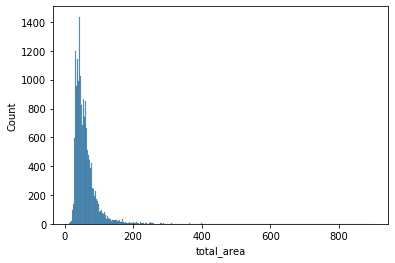

In [40]:
sb.histplot(x = 'total_area', data=data)

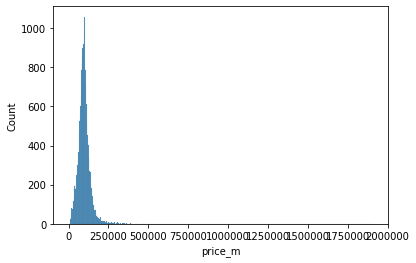

In [47]:
sb.histplot(x = 'price_m',data = data)

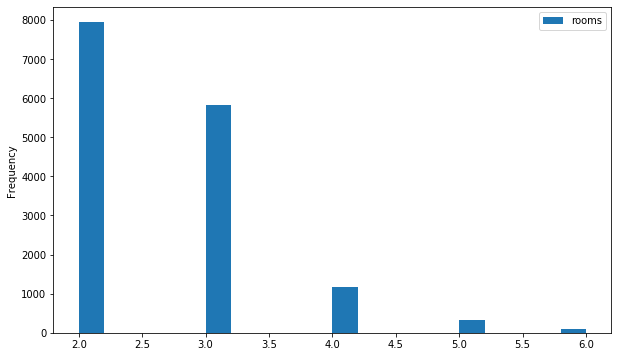

In [70]:
#Здесь тоже, может, есть нереальные значения.
data['rooms'].describe()
rooms_max = data['rooms'].max()
data.query('rooms != @rooms_max').plot(y = 'rooms', kind = 'hist', range = (2,6), bins=20, figsize=(10,6))

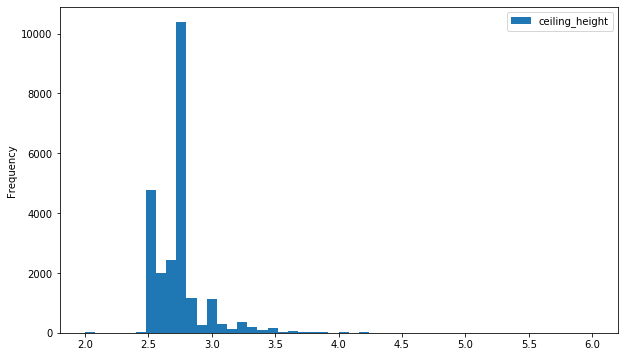

In [68]:
data['ceiling_height'].describe()
c_height_max = data['ceiling_height'].max()
data.query('ceiling_height != @c_height_max').plot(y = 'ceiling_height', kind = 'hist', range = (2,6), bins=50, figsize=(10,6))


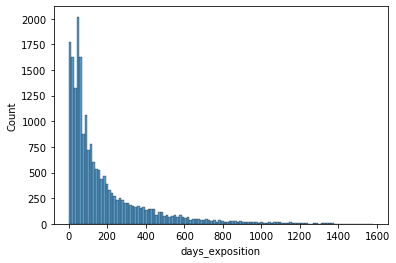

In [71]:
#Визуализация длительности пребывания объявления на сайте.
sb.histplot(x = 'days_exposition', data=data)

In [72]:
#Какой самый длительный срок на сайте. Топ-10
data['days_exposition'].value_counts().sort_values(ascending=False).head(10)

45.00    880
60.00    538
7.00     234
30.00    208
90.00    204
4.00     176
3.00     158
5.00     152
14.00    148
9.00     143
Name: days_exposition, dtype: int64

In [73]:
print('Среднее по длительности', data['days_exposition'].mean(),'\n', 'Медианное по длительности',data['days_exposition'].median())


Среднее по длительности 180.90246161345357 
 Медианное по длительности 95.0


Text(0.5, 1.0, 'Разброс длительности размещения')

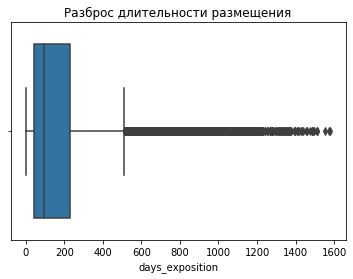

In [74]:
#data - 'days_exposition' - through its quartiles

sb.boxplot(x = 'days_exposition', data= data).set_title('Разброс длительности размещения')
#Медиана зелёненьким. Читаем: By default, they extend no more than 1.5 * IQR (IQR = Q3 - Q1)
#from the edges of the box, ending at the farthest data point within that interval.


Мне кажется, есть подход по сокращению уса за счет сокращения разницы между Q2 и Q3. Я пыталась найти способы *нормализации*, но кажется я ещё не очень уверенно использую этот термин. Короче, на данном этапе,видимо, нам разрешается откинуть какое-то максимальное значение, чтобы привести данные к чему-то более правдоподобному.

In [75]:
print(data['days_exposition'].max()/365)
#Это четыре года, уверена, что мало кто готов платить плату по прайсу https://yandex.ru/support/realty/paid.html

4.328767123287672


In [76]:
#Мы, конечно, посчитали медианное и среднее по длительности, но можно выбрать сразу топовые 25%.
data['days_exposition'].quantile([0.25, 0.5, 0.75])
fast_deal = data.query('0 < days_exposition <= 45')
fast_deal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5093 entries, 11 to 23687
Data columns (total 29 columns):
total_images            5093 non-null int64
last_price              5093 non-null float64
total_area              5093 non-null float64
first_day_exposition    5093 non-null datetime64[ns]
rooms                   5093 non-null int64
ceiling_height          5093 non-null float64
floors_total            5076 non-null float64
living_area             4725 non-null float64
floor                   5093 non-null int64
is_apartment            5093 non-null object
studio                  5093 non-null bool
open_plan               5093 non-null bool
kitchen_area            4598 non-null float64
balcony                 5093 non-null float64
locality_name           5087 non-null object
airports_nearest        4056 non-null float64
cityCenters_nearest     4062 non-null float64
parks_around3000        5093 non-null float64
parks_nearest           5093 non-null float64
ponds_around3000        

**Пояснение**

Пять тысяч девяносто три объявления из 25% быстрых - то есть самые горящие объявления.

In [77]:
data['days_exposition'].quantile([0.25, 0.5, 0.75]) #Косяк: больше 210 дней уже нельзя выставлять. Ошибка в данных.
slow_deal = data.query('95 < days_exposition <= 180+30')
slow_deal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4640 entries, 4 to 23683
Data columns (total 29 columns):
total_images            4640 non-null int64
last_price              4640 non-null float64
total_area              4640 non-null float64
first_day_exposition    4640 non-null datetime64[ns]
rooms                   4640 non-null int64
ceiling_height          4640 non-null float64
floors_total            4618 non-null float64
living_area             4409 non-null float64
floor                   4640 non-null int64
is_apartment            4640 non-null object
studio                  4640 non-null bool
open_plan               4640 non-null bool
kitchen_area            4325 non-null float64
balcony                 4640 non-null float64
locality_name           4632 non-null object
airports_nearest        3573 non-null float64
cityCenters_nearest     3581 non-null float64
parks_around3000        4640 non-null float64
parks_nearest           4640 non-null float64
ponds_around3000        4

**Пояснение**

Четыре тысячи шестьсот сорок одно объявление из 25% самых долго висящих.
<a href="https://yandex.ru/support/realty/paid.html">Правила ЯНедвижимости</a>

**Дополние**

Я немного изменила подход, чтобы выделить группу самых быстрых объявлений. Надеюсь, подход корректный в целом.

In [78]:
print(list(data.columns))
data.info()

['total_images', 'last_price', 'total_area', 'first_day_exposition', 'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor', 'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony', 'locality_name', 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition', 'price_m', 'floor_name', 'wd_exposition', 'liv_total', 'kitch_living', 'month_exposition', 'yr_exposition']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23696 entries, 0 to 23695
Data columns (total 29 columns):
total_images            23696 non-null int64
last_price              23696 non-null float64
total_area              23696 non-null float64
first_day_exposition    23696 non-null datetime64[ns]
rooms                   23696 non-null int64
ceiling_height          23696 non-null float64
floors_total            23610 non-null float64
living_area             21793 non-null float64
floor                   23696 non-null int64
is_a

In [81]:
#Определяющий фактор наискорейшей покупки жилья - близость к гор.центру
factors = ['last_price', 'total_area',  'ceiling_height', 'floors_total', 'living_area',\
           'cityCenters_nearest', 'price_m', 'liv_total', 'kitch_living', 'rooms', 'floor']

for factor in factors:
    print(factor, ':  ', fast_deal[factor].corr(fast_deal['days_exposition']))  

last_price :   0.00200879724924262
total_area :   4.3135970473102846e-05
ceiling_height :   0.0014677994271437378
floors_total :   0.0014136416306041698
living_area :   0.014458154690733369
cityCenters_nearest :   0.03103061217880171
price_m :   -0.030543488475627874
liv_total :   -0.0019065684298792578
kitch_living :   0.0063015422346477295
rooms :   0.009466102083134064
floor :   0.00957822657858488


In [82]:
#зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. 
#Проблема в том, что мы сравниваем str c int.
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corrwith.html
corr_floor_price = data['floor_name'].str.get_dummies().corrwith(data['price_m'])
print(corr_floor_price)
fast_deal.head(3)

другой       0.13
первый      -0.13
последний   -0.05
dtype: float64


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m,floor_name,wd_exposition,liv_total,kitch_living,month_exposition,yr_exposition
11,9,"3,300,000.00",44.00,2018-08-27,2,2.77,5.00,31.00,4,False,False,False,6.00,1.00,Ломоносов,"48,252.00","51,677.00",0.00,"3,000.00",0.00,"3,000.00",7.00,"75,000.00",другой,0,0.70,0.19,8,2018
15,16,"4,650,000.00",39.00,2017-11-18,1,2.77,14.00,20.50,5,0,False,False,7.60,1.00,Санкт-Петербург,"12,900.00","14,259.00",1.00,590.00,1.00,296.00,19.00,"119,230.77",другой,5,0.53,0.37,11,2017
32,3,"3,290,000.00",33.00,2018-02-04,1,2.55,16.00,14.00,3,0,False,False,8.00,0.00,Санкт-Петербург,"13,943.00","12,739.00",0.00,"3,000.00",0.00,"3,000.00",15.00,"99,696.97",другой,6,0.42,0.57,2,2018


In [83]:
# Также изучите зависимость от даты размещения: дня недели, месяца и года.
print(data['wd_exposition'].corr(data['price_m']))

-0.007270791058726713


In [84]:
#Как сравнивать огурцы с носками.
print('Отрицательная минимальная корреляция от месяца публикации объявления',\
      data['month_exposition'].corr(data['price_m']))

Отрицательная минимальная корреляция от месяца публикации объявления -0.0019507255430898525


In [85]:
#Как сравнивать огурцы с носками - 2.
print('Положительная минимальная корреляция от года публикации объявления',\
      data['yr_exposition'].corr(data['price_m']))

Положительная минимальная корреляция от года публикации объявления 0.008500541356149988


**Пояснение**

Мы рассмотрели различные виды корреляций. Из исходных данных расстояние до гор.центра -- самое важное.

Но в данных не выражены транспортные развязки.

In [87]:
#Топ-10 с наибольшим кол-вом предложений.
price_m_mean = data['price_m'].mean()
biggest_offer = pd.DataFrame(data.pivot_table(index = 'locality_name', values = ['price_m', 'cityCenters_nearest'],\
                                 aggfunc=['count']))
biggest_offer.columns = ['price_per_m', 'distance']
biggest_offer = biggest_offer.sort_values('price_per_m', ascending=False).head(10)
print(biggest_offer['price_per_m'].idxmax(), ':   ', biggest_offer['price_per_m'].max())
print('\n')
print(biggest_offer['price_per_m'].idxmin(axis=0), ':   ', biggest_offer['price_per_m'].min())

Санкт-Петербург :    15658


Кронштадт :    95


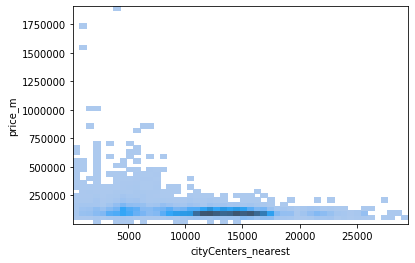

In [89]:
data_km = data.query('locality_name == "Санкт-Петербург"')
data_km.pivot_table(index = 'cityCenters_nearest', values = 'price_m', aggfunc = 'mean')
data_km.head(3)
sb.histplot(data = data_km, x = 'cityCenters_nearest', y = 'price_m', bins=50)

**Пояснение**
На данном этапе нам надо было визуально отсечь линией изменение в графике. Насколько мне позволяет визуальный анализ, 
дистанция в 8000 -- норм для центра Спб.

In [90]:
spb_center = pd.DataFrame(data_km.query('cityCenters_nearest < 8000'))
spb_center.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m,wd_exposition,liv_total,kitch_living,month_exposition,yr_exposition
count,"3,712.00","3,712.00","3,712.00","3,712.00","3,712.00","3,705.00","3,406.00","3,712.00","3,362.00","3,712.00","3,706.00","3,712.00","3,712.00","3,712.00","3,712.00","3,712.00","3,104.00","3,712.00","3,712.00","3,406.00","3,288.00","3,712.00","3,712.00"
mean,10.25,"14,729,617.54",92.33,2.81,2.99,7.24,53.89,4.28,14.43,0.33,"24,646.34","4,691.31",1.03,"1,324.90",1.28,"1,183.10",245.08,"144,404.87",2.53,0.58,0.34,6.43,"2,017.17"
std,6.01,"24,704,514.22",60.53,1.46,0.71,3.97,37.38,3.06,9.31,0.77,"4,303.88","1,766.70",0.94,"1,225.75",1.09,"1,165.44",271.43,"91,844.54",1.72,0.12,0.30,3.46,1.12
min,0.00,"1,600,000.00",12.00,0.00,2.00,2.00,2.00,1.00,2.00,0.00,"12,388.00",181.00,0.00,9.00,0.00,22.00,3.00,"15,345.27",0.00,0.02,0.04,1.00,"2,014.00"
25%,6.00,"6,590,000.00",56.00,2.00,2.77,5.00,31.00,2.00,9.00,0.00,"21,776.50","3,585.00",0.00,361.00,0.00,317.00,60.00,"100,000.00",1.00,0.51,0.18,3.00,"2,017.00"
50%,10.00,"9,000,000.00",77.76,3.00,2.80,6.00,45.00,4.00,12.00,0.00,"24,324.00","4,811.00",1.00,601.00,1.00,616.00,139.50,"123,629.21",3.00,0.60,0.25,6.00,"2,017.00"
75%,15.00,"14,131,375.00",108.73,3.00,3.10,9.00,65.00,5.00,16.78,0.00,"27,119.50","5,951.00",2.00,"3,000.00",2.00,"3,000.00",342.00,"154,965.80",4.00,0.66,0.39,10.00,"2,018.00"
max,50.00,"763,000,000.00",900.00,19.00,32.00,27.00,409.70,25.00,112.00,5.00,"39,763.00","7,998.00",3.00,"3,000.00",3.00,"3,000.00","1,572.00","1,907,500.00",6.00,0.98,5.33,12.00,"2,019.00"


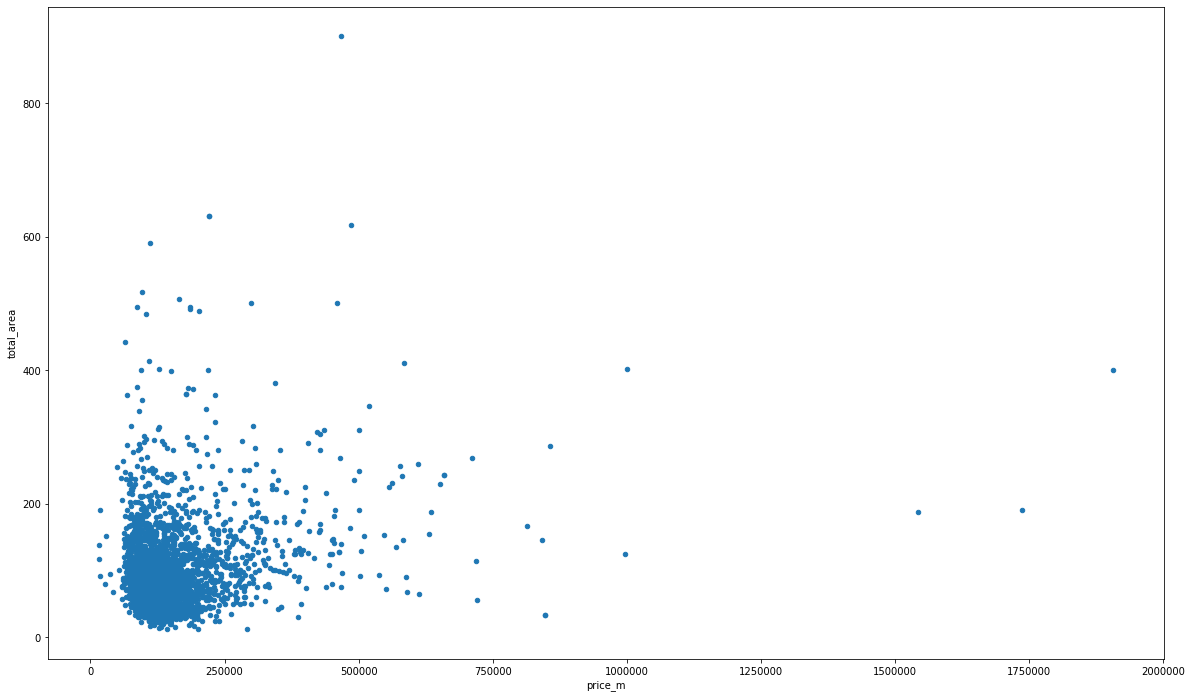

In [91]:
spb_center.plot(kind = 'scatter', y ='total_area', x = "price_m", figsize=(20,12))

**Пояснение**
Точечки! Наибольшая плотность в квадрате до 150 кв.метров и до 200 000 рублей за кв. метр. Это самые предлагаемые квартиры. Студии или квартиры около 50 кв. метров затерялись в центре синевы.

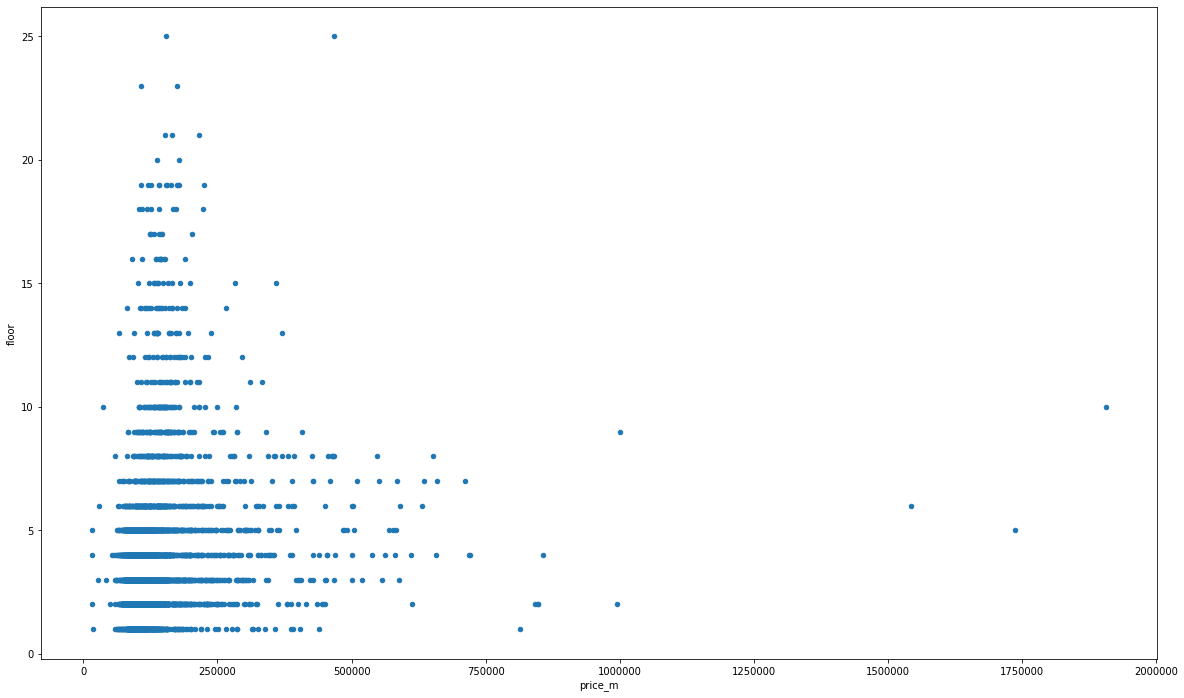

In [92]:
spb_center.plot(kind = 'scatter', y ='floor', x = "price_m", figsize=(20,12))

**Пояснение** В задании надо было нарисовать гистограммы. Но есть идеальный график-многоэтажка. Максимум предложений: квартиры до 7 этажа.

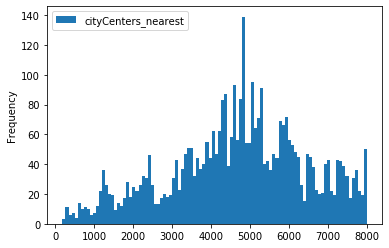

In [93]:
spb_center.plot(kind = 'hist', bins = 100, y ='cityCenters_nearest', x = "price_m")

**Пояснение**
Некрасивый график. Но зато видно, что в радиусе 5-6 км больше всего предложений.

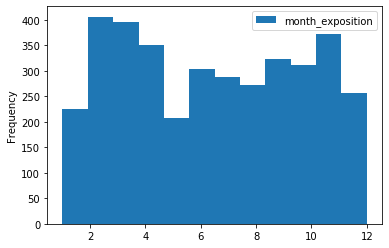

In [94]:
spb_center.plot(kind = 'hist', bins=12, y ='month_exposition', x = "price_m")

**Пояснение**
Гистограмма идеальна для отображения показателей по месяцам. Предложения растут в феврале, падают в мае, растут в ноябре.

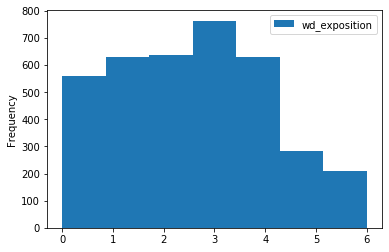

In [95]:
spb_center.plot(kind = 'hist', bins = 7, y ='wd_exposition', x = "price_m")

**Пояснение**
Гистограмма идеальна для отображения показателей и по дням недели. Предложения появляются в течение рабочей недели, четверг самый топовый день, чтобы искать свежие предложения на сайте. В выходные отдыхают, видимо, люди.

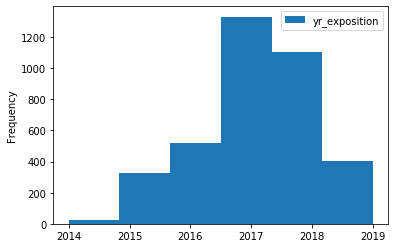

In [96]:
spb_center.plot(kind = 'hist', bins = 6, y ='yr_exposition', x = "price_m")

Пояснение Гистограмма идеальна для отображения показателей -- да -- и для годов. 2017 -- год предложения.

In [99]:
spb_center_factors = ['rooms', 'floor', 'cityCenters_nearest', 'yr_exposition']
for i in spb_center_factors:
    print(i, ':   ', spb_center[i].corr(spb_center["price_m"]))

rooms :    0.006246787763255124
floor :    0.12395509756083338
cityCenters_nearest :    -0.03093863923859851
yr_exposition :    0.007816064191341522


**Комментарий**
Этаж важен, но немного. В центральной зоне расстояние уже не играет той важной роли, что по всем городам и сёлам. О количестве комнат тоже не заботятся сильно.

### Шаг 5. Общий вывод

Проведён анализ объявлений о недвижимости по данным с сайта Яндекс.Недвижимость. Часть данных была утеряна в силу человеческого фактора.


При выявлении самых быстропродаваемых квартир мы обошлись 25% объявлений с наикратчайшим сроком пребывания на сайте. Исходим из предположения, что закрытие объявляения означает сделку.


В сегмент самых "долгих" объявлений попали объявления о 95 до 210 дней. Крайняя граница обусловлена максимальным сроком размещения, разрешённым на сайте, включая платное размещение.


Были выявлены следующие закономерности:

- Самые дорогие квартиры в СПб. Это ожидаемо - культурный центр РФ, большой город с большим предложеие работы.

- Самые дешёвые - в Кронштадте. Это, кстати, остров. Здесь роль играет транспортная недоступность.

- Удаленность от центра города является важным фактором ценообразования для данных в целом.

    - Но для выборки по более узкому радиусу ("центр" 7,5км), роль играет площадь и цена за метр. Видимо, для большинства в центре транспортная проблема играет меньшую роль.

- Быстрая сделка до 45 дней. Самая долгая по данным 232 дня, что неверно: 210 дней максимум из дозволенного, даже за плату, на сайте. Хотя, может, это вкрались нерабочие дни типа НГ, майских и других праздников, хотя странно, ведь удаление объявления должно быть автоматизировано.

- Самые быстро распродаваемые квартиры в "центре": до 150 кв. м и от 200 000 руб. за кв. метр. 

- Свежие предложения на сайте появляются в течение рабочей недели. В течение года: в феврале (месяц после праздников) и в ноябре (перед длинными каникулами) больше всего предложений. Май - провальный, мб в силу майских праздников.

- Максимум предложение достигло в 2017 г. Одно из предположений исходя из общероссийской ситуации в том году: экономический кризис. Но это неточно, лишь канва событий.

**Минусы анализа**:
Неуверенно нормирую данные (уместно ли вообще такое выражение?) и не всегда могу аргументировать, как нашла аномалию на исключение. Не знаю толком, что такое выбросы.

### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения **кроме столбца с удалённостью от аэропортов**
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x] есть общий вывод

**Спасибо за ревью**